<h1> Preprocessing </h1>

In [1]:
import pandas as pd

In [2]:
raw_dataset = pd.read_csv("Dermatology.csv", na_values="?")

In [3]:
dataset = raw_dataset.dropna()
dataset.reset_index(drop=True, inplace=True) #reorder rows

In [4]:
dataset.tail() #if you want to print everything, just type 'dataset'

,erythema,scaling,definiteBorders,itching,koebnerPhenomenon,polygonalPapules,follicularPapules,oralMucosal,kneeElbow,scalp,...,disappearance,vacuolisation,spongiosis,sawTooth,follicularPlug,perifollicular,mononuclear,bandLike,age,disease
353,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
354,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
355,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
356,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3
357,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35.0,1


<h1> Artificial Neural Network </h1>

In [5]:
import __future__ #for future features in newer versions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
train_dataset = dataset.sample(frac=0.75,random_state=0) #that's the seed for the randomization 
test_dataset = dataset.drop(train_dataset.index)

<b> The label is the value we want to predict (in this case, we want to predict the disease): </b>

In [7]:
train_labels = train_dataset.pop('disease')
test_labels = test_dataset.pop('disease')

In [28]:
#34 features + 1 (disease)
def build_model():
    model = keras.Sequential([
        layers.Input(len(train_dataset.keys())), #input_shape = 34
        layers.Dense(16, activation = 'relu'),
        layers.Dense(8, activation = 'relu'),
        layers.Dense(7, activation = 'softmax'), #6 possible diseases
    ])

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc']) 
    #sparse is used here because our target values are not one-hot-enconded, but integers

    return model

In [29]:
model = build_model()
print(model.summary())

#params = atual *(anterior +1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                560       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 63        
Total params: 759
Trainable params: 759
Non-trainable params: 0
_________________________________________________________________
None


<b> Now we have to see if the model training shows decreasing loss and any improvement in accuracy (acc): </b>

In [30]:
predicted_labels_ANN = model.fit(train_dataset, train_labels, epochs=85)

Epoch 1/85
268/268 [==============================] - 0s 561us/sample - loss: 7.1800 - acc: 0.1418
Epoch 2/85
268/268 [==============================] - 0s 104us/sample - loss: 5.7805 - acc: 0.1604
Epoch 3/85
268/268 [==============================] - 0s 75us/sample - loss: 4.7012 - acc: 0.2239
Epoch 4/85
268/268 [==============================] - 0s 90us/sample - loss: 3.9065 - acc: 0.3060
Epoch 5/85
268/268 [==============================] - 0s 75us/sample - loss: 3.2600 - acc: 0.3470
Epoch 6/85
268/268 [==============================] - 0s 90us/sample - loss: 2.6839 - acc: 0.4067
Epoch 7/85
268/268 [==============================] - 0s 90us/sample - loss: 2.1783 - acc: 0.4627
Epoch 8/85
268/268 [==============================] - 0s 90us/sample - loss: 1.7946 - acc: 0.4813
Epoch 9/85
268/268 [==============================] - 0s 60us/sample - loss: 1.5340 - acc: 0.5112
Epoch 10/85
268/268 [==============================] - 0s 75us/sample - loss: 1.3843 - acc: 0.5597
Epoch 11/85
268/2

268/268 [==============================] - 0s 60us/sample - loss: 0.0560 - acc: 0.9813
Epoch 84/85
268/268 [==============================] - 0s 104us/sample - loss: 0.0535 - acc: 0.9851
Epoch 85/85
268/268 [==============================] - 0s 60us/sample - loss: 0.0540 - acc: 0.9888


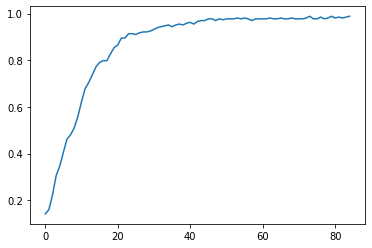

In [31]:
from matplotlib import pyplot

pyplot.plot(predicted_labels_ANN.history['acc'])
pyplot.show()

In [24]:
test_loss, test_acc = model.evaluate(train_dataset, train_labels)

268/268 [==============================] - 0s 269us/sample - loss: 0.2077 - acc: 0.9813


In [25]:
final_results = model.evaluate(test_dataset, test_labels)

90/90 [==============================] - 0s 44us/sample - loss: 0.2572 - acc: 0.9667


<h1> Naive Bayes </h1>

<b> Let's test the Gaussian Naive Bayes approach: </b>

In [64]:
from sklearn.naive_bayes import GaussianNB

modelB = GaussianNB().fit(train_dataset, train_labels) 

In [74]:
predicted_label = modelB.predict(test_dataset)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(test_labels, predicted_label) 
print (accuracy_score)

0.9111111111111111


<h1> Metrics </h1>

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [78]:
# This is a function to display dataframes for a better analysis
#https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [82]:
prediction_ANN = model.predict(test_dataset) #shows the probabilities for each disease given one row
predictions_ANN = np.argmax(prediction_ANN, axis = 1) #the highest probability value is taken by the disease for that row

labels = list(set(test_labels))
df_ANN = pd.DataFrame(
    data = confusion_matrix(test_labels, predictions_ANN, labels=labels),
    columns=labels,
    index=labels
)


df_GNB = pd.DataFrame(
    data  = confusion_matrix(test_labels, predicted_label, labels=labels),
    columns=labels,
    index=labels
)

display_side_by_side([df_ANN, df_GNB], ['ANN', 'GNB'])

,1,2,3,4,5,6
1,35,1,0,0,0,0
2,0,10,0,2,0,0
3,0,0,14,0,0,0
4,1,0,0,13,0,0
5,0,0,0,0,12,0
6,0,0,0,0,0,2
,1,2,3,4,5,6
1,36,0,0,0,0,0
2,0,5,0,6,0,1
3,0,0,14,0,0,0


In [84]:
print(classification_report(test_labels, predictions_ANN, digits=4))
print(classification_report(test_labels, predicted_label, digits=4))

              precision    recall  f1-score   support

           1     0.9722    0.9722    0.9722        36
           2     0.9091    0.8333    0.8696        12
           3     1.0000    1.0000    1.0000        14
           4     0.8667    0.9286    0.8966        14
           5     1.0000    1.0000    1.0000        12
           6     1.0000    1.0000    1.0000         2

    accuracy                         0.9556        90
   macro avg     0.9580    0.9557    0.9564        90
weighted avg     0.9560    0.9556    0.9554        90

              precision    recall  f1-score   support

           1     0.9730    1.0000    0.9863        36
           2     1.0000    0.4167    0.5882        12
           3     1.0000    1.0000    1.0000        14
           4     0.6842    0.9286    0.7879        14
           5     1.0000    1.0000    1.0000        12
           6     0.6667    1.0000    0.8000         2

    accuracy                         0.9111        90
   macro avg     0.8873